[nltk_data] Downloading package stopwords to C:\Users\ASIF
[nltk_data]     UMAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Overall Model Performance:
Accuracy: 0.9629629629629629
Confusion Matrix:
[[25  1]
 [ 1 27]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        26
           1       0.96      0.96      0.96        28

    accuracy                           0.96        54
   macro avg       0.96      0.96      0.96        54
weighted avg       0.96      0.96      0.96        54



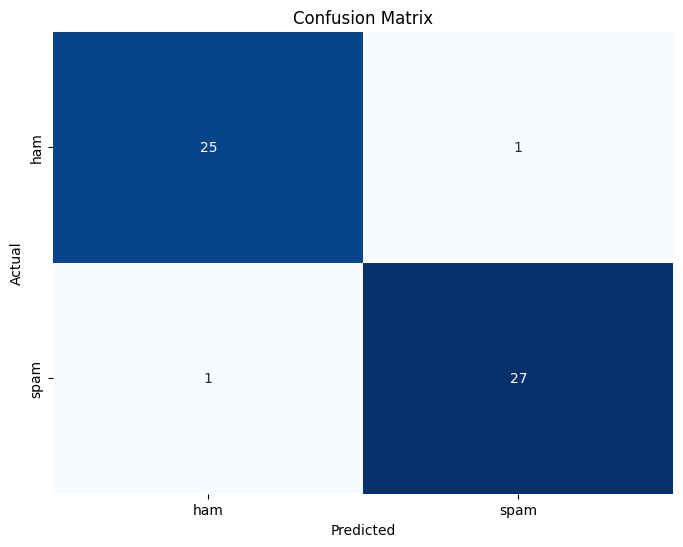

Enter an email text (or 'exit' to quit):  Congratulations! You've won a free vacation to an exotic location. Click here to claim your prize now!


Predicted label: spam



Enter an email text (or 'exit' to quit):  exit


Exiting...


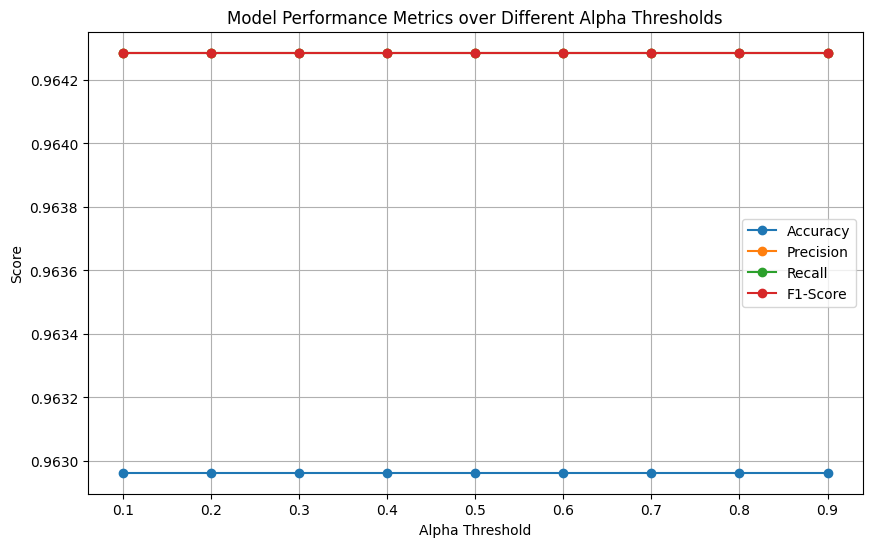

In [1]:
import pandas as pd
import string
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Load dataset
dataset_path = 'email_classification.csv' 
df = pd.read_csv(dataset_path)

# Pre-processing function
def preprocess_text(email):
    email = email.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = email.split()  # Tokenize text
    tokens = [word.lower() for word in tokens if word.lower() not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(tokens)

# Apply preprocessing to 'email' column
df['email'] = df['email'].apply(preprocess_text)

# Encode labels
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['email'], df['label'], test_size=0.3, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize Naive Bayes classifier
model = MultinomialNB()

# Train the model
model.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Print model performance
print(f'Overall Model Performance:')
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Function to classify a single email
def classify_email(input_text):
    # Preprocess the input text
    processed_text = preprocess_text(input_text)
    
    # Vectorize the processed text using the trained TF-IDF vectorizer
    input_vectorized = tfidf_vectorizer.transform([processed_text])
    
    # Predict using the trained model
    prediction = model.predict(input_vectorized)[0]
    
    # Map prediction to label
    label = "spam" if prediction == 1 else "non-spam"
    
    return label

# Function to interactively classify emails
def classify_email_interactive():
    while True:
        try:
            # Prompt user for email input
            input_email = input("Enter an email text (or 'exit' to quit): ")
            
            # Check if user wants to exit
            if input_email.lower() == 'exit':
                print("Exiting...")
                break
            
            # Classify email using the model
            predicted_label = classify_email(input_email)
            print(f"Predicted label: {predicted_label}\n")
        
        except KeyboardInterrupt:
            print("\nExiting...")
            break
        except Exception as e:
            print(f"Error: {str(e)}")
            continue

# Main script execution
if __name__ == "__main__":
    # Example usage of classify_email function
    classify_email_interactive()

    # Line plot to show performance metrics
    thresholds = np.arange(0.1, 1.0, 0.1)
    accuracies = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in thresholds:
        model.set_params(alpha=threshold)
        model.fit(X_train_tfidf, y_train)
        y_pred = model.predict(X_test_tfidf)
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

        accuracies.append(accuracy)
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, accuracies, label='Accuracy', marker='o')
    plt.plot(thresholds, precisions, label='Precision', marker='o')
    plt.plot(thresholds, recalls, label='Recall', marker='o')
    plt.plot(thresholds, f1_scores, label='F1-Score', marker='o')
    plt.xlabel('Alpha Threshold')
    plt.ylabel('Score')
    plt.title('Model Performance Metrics over Different Alpha Thresholds')
    plt.legend()
    plt.grid(True)
    plt.show()
